In [285]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import sys
sys.path.append('../src/')
sys.path.append('../src/exp_004')
from preprocess import read_data, get_data

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [286]:
X_train, y, group, X_test, submit = get_data()

../src/exp_004/preprocess.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output_df['date'] = pd.to_datetime(output_df['date'])
../src/exp_004/preprocess.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output_df['dayofweek'] = output_df['date'].dt.dayofweek.astype('category')
../src/exp_004/preprocess.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

==================== start run blocks ====================
	- <preprocess.TargetEncodingBlock object at 0x7fe560c28310> 1.781[s]
	- <preprocess.TargetEncodingBlock object at 0x7fe560c28390> 1.747[s]
	- <preprocess.CountEncodingBlock object at 0x7fe55ff1abd0> 1.312[s]
run test = False 4.850[s]
==================== start run blocks ====================
	- <preprocess.TargetEncodingBlock object at 0x7fe560c28310> 0.070[s]
	- <preprocess.TargetEncodingBlock object at 0x7fe560c28390> 0.059[s]
	- <preprocess.CountEncodingBlock object at 0x7fe55ff1abd0> 0.116[s]
run test = True 0.249[s]


In [287]:
X_train.head()

,lat,lon,co_cnt,co_min,co_mid,co_max,co_var,o3_cnt,o3_min,o3_mid,...,TE_meanis_holiday@TargetEncodingBlock,TE_stdmonth@TargetEncodingBlock,TE_stdCountry@TargetEncodingBlock,TE_stddayofweek@TargetEncodingBlock,TE_stdis_holiday@TargetEncodingBlock,CE_year@CountEncodingBlock,CE_month@CountEncodingBlock,CE_day@CountEncodingBlock,CE_Country@CountEncodingBlock,CE_dayofweek@CountEncodingBlock
0,-27.46794,153.02809,38,0.749,2.590,2.633,0.850,29,2.397,4.295,...,59.054433,51.561721,26.415061,38.644090,38.606203,69365,14092,6590,5656,28208
1,-12.46113,130.84185,47,2.594,3.181,4.828,1.208,49,3.092,7.572,...,58.551074,48.941711,25.215408,37.351057,37.287419,69365,14092,6590,5656,28208
2,-37.81400,144.96332,17,1.190,1.197,2.200,0.248,123,0.736,12.527,...,59.895027,52.724575,25.760983,39.243338,39.201212,69365,14092,6590,5656,28208
3,-32.92953,151.78010,63,4.586,11.044,14.802,24.186,90,1.917,14.141,...,59.895027,52.724575,25.760983,39.243338,39.201212,69365,14092,6590,5656,28208
4,-31.95224,115.86140,47,4.689,8.681,11.100,10.011,83,0.349,2.349,...,58.551074,48.941711,25.215408,37.351057,37.287419,69365,14092,6590,5656,28208


In [289]:
X_train.isnull().sum().sort_values()

lat                                      0
co_range                                 0
Country                                  0
day                                      0
month                                    0
                                      ... 
no2_var                                  0
no2_max                                  0
CE_dayofweek@CountEncodingBlock          0
TE_stdCountry@TargetEncodingBlock     2887
TE_meanCountry@TargetEncodingBlock    2887
Length: 78, dtype: int64

In [290]:
X_test.isnull().sum().sort_values()

lat                                0
o3_range                           0
co_range                           0
Country                            0
day                                0
                                  ..
temperature_cnt                    0
no2_var                            0
no2_max                            0
humidity_cnt                       0
CE_dayofweek@CountEncodingBlock    0
Length: 77, dtype: int64

<AxesSubplot:>

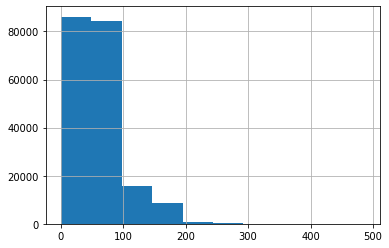

In [291]:
y.hist()

<AxesSubplot:>

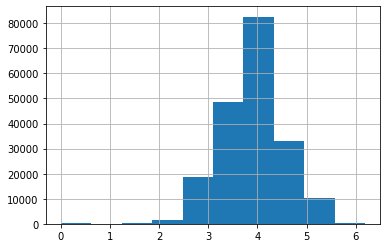

In [292]:
pd.Series(np.log1p(y)).hist()

<AxesSubplot:xlabel='month'>

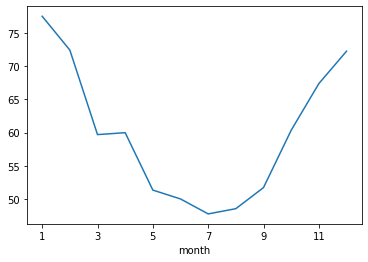

In [293]:
X_train['pm25_mid'] = y
X_train.groupby('month')['pm25_mid'].mean().plot()

<AxesSubplot:xlabel='day'>

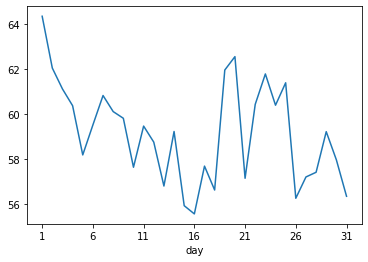

In [294]:
X_train.groupby('day')['pm25_mid'].mean().plot()

<AxesSubplot:xlabel='dayofweek'>

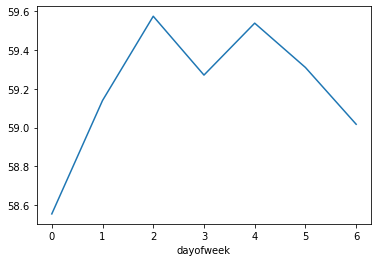

In [295]:
X_train.groupby('dayofweek')['pm25_mid'].mean().plot()